In [14]:
import pickle
from sklearn.decomposition import PCA
import numpy as np

ClassNames = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square',
 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']

ModuleNotFoundError: No module named 'torch'

In [16]:
# Load in pckl files of logits and yvals
with open('/work/contractors/jtaylor/acoustic_scene_classification/demo/twostage_embeddings.pckl', 'rb') as f:
    two_stage_embeddings, two_stage_y = pickle.load(f)
    
print(two_stage_embeddings)
print(two_stage_y)

pca3 = PCA(3)
pca3.fit(two_stage_embeddings)
embeddings3 = pca3.transform(two_stage_embeddings)
print(embeddings3)
    

[[ 1.8427321  -0.3749642  -0.4783586  ...  0.38837594 -0.37789768
  -0.47920603]
 [ 0.8343821  -0.4724266  -0.48313826 ...  0.7861901  -0.32821506
  -0.30846524]
 [ 1.4509174  -0.475612   -0.47237918 ...  0.5922503  -0.46731827
  -0.46562275]
 ...
 [-0.48032358 -0.25730285  0.47731724 ... -0.41788015 -0.42761204
   2.1904175 ]
 [-0.48315805  1.2655264   0.24753512 ... -0.48332635 -0.48348597
  -0.25201282]
 [-0.18743058  0.45547202  0.42875192 ... -0.328954   -0.4777779
   1.2021526 ]]
[0 0 0 ... 9 9 9]
[[ 0.2017309   1.4312834  -0.14845693]
 [ 0.35757843  0.89702183  0.14259885]
 [ 0.32067916  1.093938    0.23514329]
 ...
 [-1.4473492  -0.9158883   0.01410813]
 [-0.7841644  -0.7407675   0.5638561 ]
 [-1.3658116  -0.6610927  -0.08615998]]


/work/contractors/jtaylor/.conda/envs/late_fusion/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


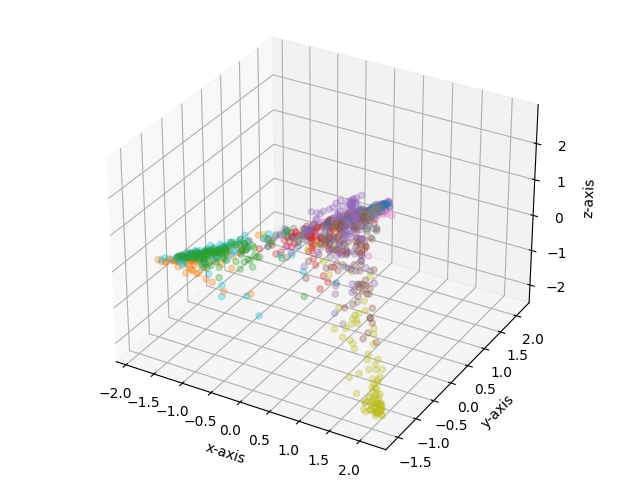

In [9]:
data = embeddings3
ids = two_stage_y
# creating 3d plot using matplotlib 
# in python
 
# for creating a responsive plot
%matplotlib widget
 
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
indices = np.random.choice(len(data), size=1000, replace=False)

# Extract x, y, and z coordinates from the sampled indices
x = data[indices, 0]
y = data[indices, 1]
z = data[indices, 2]

# Extract IDs for the sampled indices
sampled_ids = [ids[i] for i in indices]

# Map IDs to colors using the colormap
color_list = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
colors = [color_list[i] for i in sampled_ids]

# creating figure
fig = plt.figure()
ax = Axes3D(fig)
 
# creating the plot 
unique_ids = np.unique(sampled_ids)

for i, unique_id in enumerate(unique_ids):
    # Select data points for the current ID
    id_mask = sampled_ids == unique_id
    x_id = x[id_mask]
    y_id = y[id_mask]
    z_id = z[id_mask]

    # Plot the data points with color-coding
    colors_id = [color for color, mask in zip(colors, id_mask) if mask]
    ax.scatter(x_id, y_id, z_id, c=colors_id, label=ClassNames[unique_id], alpha=0.3)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
 
# displaying the plot
plt.show()

In [19]:
# Load in pckl files of logits and yvals
with open('/work/contractors/jtaylor/acoustic_scene_classification/demo/rfrcnn_embeddings.pckl', 'rb') as f:
    rfr_cnn_embeddings, rfr_cnn_y = pickle.load(f)

print(rfr_cnn_embeddings)
print(rfr_cnn_y)

pca3 = PCA(3)
pca3.fit(rfr_cnn_embeddings)
rfr_cnn_embeddings3 = pca3.transform(rfr_cnn_embeddings)
print(embeddings3)

[[-0.73985285 -2.066696   -2.5725865  ...  5.8837247   0.6111112
  -2.608677  ]
 [-1.2862881   0.06634349  7.9030457  ... -2.1543047  -1.007835
   0.70596176]
 [-1.4856411  -0.5329039  -1.8643749  ... -0.718929    0.47394505
  -0.81151205]
 ...
 [-0.11966811  1.375066    0.7344575  ... -0.80066705 -1.3592854
   7.9963827 ]
 [-0.17927802  1.5729713   0.2826499  ... -0.64828104 -0.41531366
   8.039931  ]
 [ 0.5003424   1.1761441  -0.19686343 ... -0.9591739  -0.8487953
   7.696538  ]]
[7 2 4 ... 9 9 9]
[[-4.924198    1.0267373  -1.7922702 ]
 [ 6.020062   -1.5212005   3.4002616 ]
 [-0.53780186  3.772221    0.94711864]
 ...
 [ 6.7017612  -1.4965192  -3.6493576 ]
 [ 6.7359896  -0.5987398  -3.0501263 ]
 [ 5.72814    -0.73015475 -4.082454  ]]


/work/contractors/jtaylor/.conda/envs/late_fusion/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


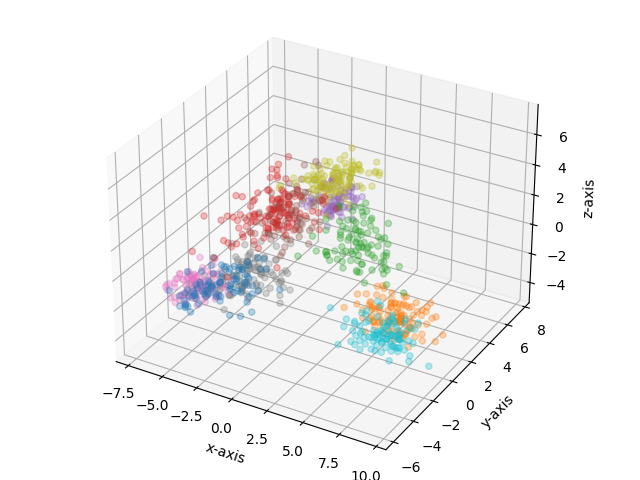

In [20]:
data = rfr_cnn_embeddings3
ids = rfr_cnn_y
# creating 3d plot using matplotlib 
# in python
 
# for creating a responsive plot
%matplotlib widget
 
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
indices = np.random.choice(len(data), size=1000, replace=False)

# Extract x, y, and z coordinates from the sampled indices
x = data[indices, 0]
y = data[indices, 1]
z = data[indices, 2]

# Extract IDs for the sampled indices
sampled_ids = [ids[i] for i in indices]

# Map IDs to colors using the colormap
color_list = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
colors = [color_list[i] for i in sampled_ids]

# creating figure
fig = plt.figure()
ax = Axes3D(fig)
 
# creating the plot 
unique_ids = np.unique(sampled_ids)

for i, unique_id in enumerate(unique_ids):
    # Select data points for the current ID
    id_mask = sampled_ids == unique_id
    x_id = x[id_mask]
    y_id = y[id_mask]
    z_id = z[id_mask]

    # Plot the data points with color-coding
    colors_id = [color for color, mask in zip(colors, id_mask) if mask]
    ax.scatter(x_id, y_id, z_id, c=colors_id, label=ClassNames[unique_id], alpha=0.3)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
 
# displaying the plot
plt.show()

In [21]:
# Load in pckl files of logits and yvals
with open('/work/contractors/jtaylor/acoustic_scene_classification/demo/latefusion_embeddings.pckl', 'rb') as f:
    latefusion_embeddings, latefusion_y = pickle.load(f)

print(latefusion_embeddings)
print(latefusion_y)

pca3 = PCA(3)
pca3.fit(latefusion_embeddings)
latefusion_embeddings3 = pca3.transform(latefusion_embeddings)
print(latefusion_embeddings3)

[[-0.06039805 -0.43096372 -0.46264714 ...  2.1210213  -0.45562285
  -0.46700883]
 [-0.29145822  0.61598    -0.11724152 ... -0.41635332 -0.41803986
   0.23439994]
 [-0.39673987 -0.38181105 -0.2617751  ... -0.36966842  0.00288027
  -0.38123137]
 ...
 [-0.3784406   0.4636483  -0.1682663  ... -0.33722523 -0.33151242
   0.22451696]
 [-0.4589836   0.46122476 -0.26171637 ... -0.46113613 -0.31958923
   1.5722746 ]
 [-0.41265705  0.62288487 -0.34098256 ... -0.3112509  -0.429946
   1.3809655 ]]
[7 3 4 ... 9 9 9]
[[-1.1551174  -0.6188409   0.12943856]
 [ 1.5477394  -0.07457455 -0.06162282]
 [-0.7225724   1.3712163   2.4461563 ]
 ...
 [ 1.4444755   0.01387569 -0.11538289]
 [ 1.6500854   0.22961082  0.07918568]
 [ 1.7025224   0.10095021  0.08531543]]


In [ ]:
data = latefusion_embeddings3
ids = latefusion_y
# creating 3d plot using matplotlib 
# in python
 
# for creating a responsive plot
%matplotlib widget
 
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
indices = np.random.choice(len(data), size=1000, replace=False)

# Extract x, y, and z coordinates from the sampled indices
x = data[indices, 0]
y = data[indices, 1]
z = data[indices, 2]

# Extract IDs for the sampled indices
sampled_ids = [ids[i] for i in indices]

# Map IDs to colors using the colormap
color_list = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
colors = [color_list[i] for i in sampled_ids]

# creating figure
fig = plt.figure()
ax = Axes3D(fig)
 
# creating the plot 
unique_ids = np.unique(sampled_ids)

for i, unique_id in enumerate(unique_ids):
    # Select data points for the current ID
    id_mask = sampled_ids == unique_id
    x_id = x[id_mask]
    y_id = y[id_mask]
    z_id = z[id_mask]

    # Plot the data points with color-coding
    colors_id = [color for color, mask in zip(colors, id_mask) if mask]
    ax.scatter(x_id, y_id, z_id, c=colors_id, label=ClassNames[unique_id], alpha=0.3)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
 
# displaying the plot
plt.show()